# Programming in Python
## Exam: February 25, 2025


You can solve the exercises below by using standard Python 3.12 libraries, NumPy, Matplotlib, Pandas, PyMC.
You can browse the documentation: [Python](https://docs.python.org/3.12/), [NumPy](https://numpy.org/doc/1.26/index.html), [Matplotlib](https://matplotlib.org/3.10.0/users/index.html), [Pandas](https://pandas.pydata.org/pandas-docs/version/2.2/index.html), [PyMC](https://www.pymc.io/projects/docs/en/stable/api.html).
You can also look at the [slides](https://homes.di.unimi.it/monga/lucidi2425/pyqb00.pdf) or your code on [GitHub](https://github.com).


**The exam is "open book", but it is strictly forbidden to communicate with others or "ask questions" online (i.e., stackoverflow is ok if the answer is already there, but you cannot ask a new question or use ChatGPT and similar products). Suspicious canned answers or plagiarism among student solutions will cause the invalidation of the exam for all the people involved.**

To test examples in docstrings use

```python
import doctest
doctest.testmod()
```

**SOLVE EACH EXERCISE IN ONE OR MORE NOTEBOOK CELLS AFTER THE QUESTION.**

In [17]:
import numpy as np   # type: ignore
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore

### Exercise 1 (max 1 points)

The file [Howell1.csv](./Howell1.csv) contains partial census data for !Kung San people (Africa), collected by Nancy Howell (~ 1960), csv comes from R. McElreath, "Statistical Rethinking", 2020.

Read the file in a proper Pandas DataFrame.



In [18]:
df = pd.read_csv('Howell1.csv', sep=';')
print(df.columns)

Index(['height', 'weight', 'age', 'male'], dtype='object')


### Exercise 2 (max 6 points)

We want to add to data a new column `parent` with the index number of one the parents of the individual described by the current row. For example, if the row with index 3 has 0 has its `parent`, this means that the individual described by the row with index 0 is one of the parents of the individual described by row with index 3. 
The `parent` column must be populated by randomly selecting from all individuals with an age greater than the child's age plus 15
years, but less then the child's age plus 50. To illustrate this, for the male individual in the row 3 (aged 41), any of the 66 individuals aged between 56 and 91 (extremes included) could be chosen as a parent. In the random selection process, each potential candidate should have an equal probability of being selected. If no individual old enough exists, the parent should be set to -1.

In [19]:
import numpy as np
print(df.columns)
def random_parent_idx(df):
    parent_list = []
    ages = df['age'].values
    n = len(df)
    for i in range(n):
        age_child = ages[i]
        # 15岁以上，50岁以内的成年人可作为父母
        candidates = df[
            (df['age'] > age_child + 15) & 
            (df['age'] < age_child + 50)
        ]
        if len(candidates) > 0:
            parent_idx = np.random.choice(candidates.index)
        else:
            parent_idx = -1  # 没有合适父母
        parent_list.append(parent_idx)
    return parent_list

df['parent'] = random_parent_idx(df)
df.head()

Index(['height', 'weight', 'age', 'male'], dtype='object')


,height,weight,age,male,parent
0,151.765,47.825606,63.0,1,222
1,139.700,36.485807,63.0,0,222
2,136.525,31.864838,65.0,0,222
3,156.845,53.041914,41.0,1,416
4,145.415,41.276872,51.0,0,164


### Exercise 3 (max 5 points)

Compute the average age difference between an individual and their parent (ignore -1 parents). To get the full marks do not use explicit loops.

In [20]:

# 只选父母不是-1的行
mask = df['parent'] != -1
child_ages = df.loc[mask, 'age'].values
parent_ages = df.loc[df.loc[mask, 'parent'], 'age'].values
age_diffs = parent_ages - child_ages
avg_age_diff = age_diffs.mean()
print(avg_age_diff)

27.507685009487666


### Exercise 4 (max 6 points)

Define a function that takes a Pandas Series and compute a new Series in which each pair of consecutive values is swapped. For example, if the values are 1,2,3,4,5 then the result is a Series with 2,1,4,3,5.

To get the full marks, you should declare correctly the type hints and add a doctest string.

In [24]:
import pandas as pd
import doctest
def swap_pairs(s: pd.Series) -> pd.Series:
    """
    Returns a new Series with each pair of consecutive values swapped.

    Parameters
    ----------
    s : pd.Series
        Input Series.

    Returns
    -------
    pd.Series
        Series with swapped pairs.

    Examples
    --------
    >>> swap_pairs(pd.Series([1, 2, 3, 4, 5]))
    0    2
    1    1
    2    4
    3    3
    4    5
    dtype: int64

    >>> swap_pairs(pd.Series([10, 20, 30, 40]))
    0    20
    1    10
    2    40
    3    30
    dtype: int64
    """
    values = s.values.copy()
    # 交换偶数索引和奇数索引
    n = len(values)
    swapped = values.copy()
    swapped[0:n-1:2], swapped[1:n:2] = values[1:n:2], values[0:n-1:2]
    return pd.Series(swapped, index=s.index)
  
doctest.testmod()

TestResults(failed=0, attempted=2)

### Exercise 5 (max 3 points)

Make a scatter plot with the age of each individual and the age of their parent (ignore -1 parents). Put proper labels on the axis.

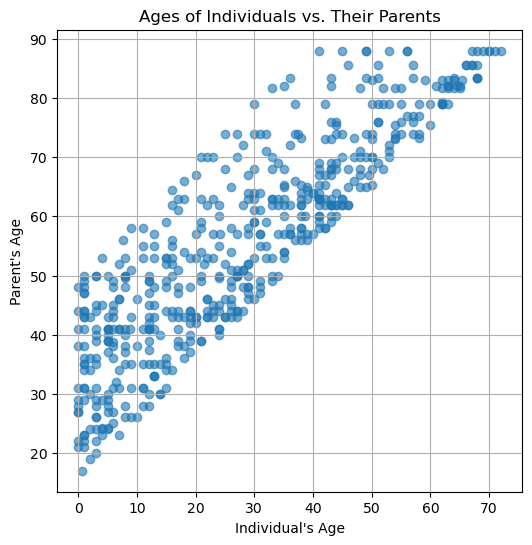

In [25]:
import matplotlib.pyplot as plt

# 保证你之前已经有 df，并且有 'age' 和 'parent' 这两列

mask = df['parent'] != -1
child_ages = df.loc[mask, 'age']
parent_ages = df.loc[df.loc[mask, 'parent'], 'age'].values

plt.figure(figsize=(6, 6))
plt.scatter(child_ages, parent_ages, alpha=0.6)
plt.xlabel("Individual's Age")
plt.ylabel("Parent's Age")
plt.title('Ages of Individuals vs. Their Parents')
plt.grid(True)
plt.show()

### Exercise 6 (max 4 points)

Consider only the individuals with a parent of the same sex. On the same axis, make a picture with two scatter plots with different colors, one per sex, of the height of the parent and the height of the child. Put proper labels and a legend.

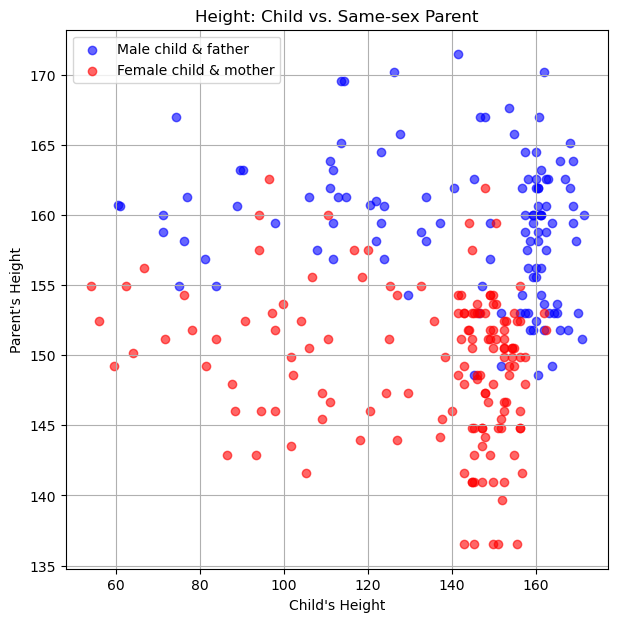

In [26]:
import matplotlib.pyplot as plt

# 1. 只考虑有父母的个体
mask = df['parent'] != -1

# 2. 父母性别和自己一样（向量化方法）
same_sex = df['male'][mask] == df.loc[df.loc[mask, 'parent'], 'male'].values
mask_same_sex = mask[mask].index[same_sex]

# 3. 取出孩子和父母的身高、性别
child_heights = df.loc[mask_same_sex, 'height']
parent_indexes = df.loc[mask_same_sex, 'parent']
parent_heights = df.loc[parent_indexes, 'height'].values
child_sex = df.loc[mask_same_sex, 'male']

# 4. 分别画男男、女女
is_male = (child_sex == 1)
is_female = (child_sex == 0)

plt.figure(figsize=(7, 7))
plt.scatter(child_heights[is_male], parent_heights[is_male], color='blue', alpha=0.6, label='Male child & father')
plt.scatter(child_heights[is_female], parent_heights[is_female], color='red', alpha=0.6, label='Female child & mother')
plt.xlabel("Child's Height")
plt.ylabel("Parent's Height")
plt.title('Height: Child vs. Same-sex Parent')
plt.legend()
plt.grid(True)
plt.show()

### Exercise 7 (max 4 points)

Add a column `siblings` with the number of child with the same parent as the current individual (consider individual with a -1 parent as siblings). To get the full marks do not use explicit loops.

In [28]:
import doctest
df['siblings'] = df.groupby('parent')['parent'].transform('count')
doctest.testmod()

TestResults(failed=0, attempted=2)

### Exercise 8 (max 4 points)

Consider this statistical model: the height of individual with a parent (different from -1) is normal with an unknown mean $\alpha + \beta\cdot H_p$, where $H_p$ is the height of the parent, and an unknown standard deviation $\sigma$. Your *a priori* estimation for both $\alpha$ and $\beta$ distribution is a normal distibution with mean 0 and std deviation 5; your *a priori* estimation for $\sigma$ exponential distribution with $\lambda=1$. Use PyMC to sample the posterior distributions after having seen the actual values for the heights. Plot the posterior distributions of the variables.

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.


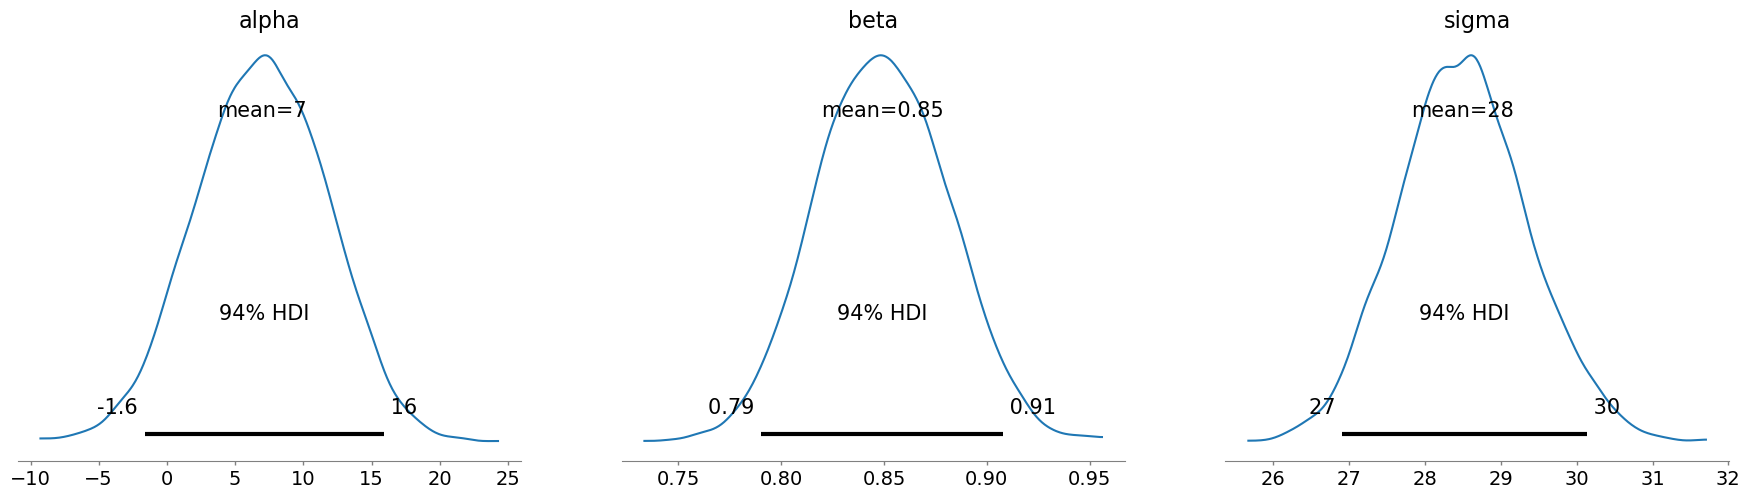

In [29]:
import pymc as pm  # 或 import pymc3 as pm，如果你用的是旧版
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

# 1. 只要有父母的人
mask = df['parent'] != -1
child_heights = df.loc[mask, 'height'].values
parent_heights = df.loc[df.loc[mask, 'parent'], 'height'].values

# 2. 定义模型
with pm.Model() as model:
    # Priors
    alpha = pm.Normal("alpha", mu=0, sigma=5)
    beta = pm.Normal("beta", mu=0, sigma=5)
    sigma = pm.Exponential("sigma", lam=1)
    
    # 线性预测
    mu = alpha + beta * parent_heights
    
    # Likelihood
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=child_heights)
    
    # 后验采样
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, progressbar=True)

# 3. 后验分布可视化
az.plot_posterior(trace, var_names=["alpha", "beta", "sigma"])
plt.show()